<a href="https://colab.research.google.com/github/Serurays/Serurays/blob/main/Earthquake_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [213]:
df = pd.read_csv('database.csv')

In [212]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [215]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [216]:
df['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [217]:
df = df[df['Type'] == 'Earthquake']

In [218]:
df['Magnitude Type'].value_counts()

MW     7722
MWC    5668
MB     3594
MWB    2458
MWW    1983
MS     1702
ML       65
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64

In [219]:
df = df[df['Magnitude Type'] == 'MW']

In [220]:
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Status']]

In [221]:
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Status
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,Automatic
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,Automatic
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,Automatic


In [222]:
df['Status'].value_counts()

Reviewed     5141
Automatic    2581
Name: Status, dtype: int64

In [164]:
import folium
from folium.plugins import MarkerCluster

df_copy = df.copy()
df_copy['Latitude'] = df_copy['Latitude'].astype(float)
df_copy['Longitude'] = df_copy['Longitude'].astype(float)

map_center = [df_copy['Latitude'].mean(), df_copy['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=2)

marker_cluster = MarkerCluster().add_to(my_map)

for index, row in df_copy.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Magnitude: {row['Magnitude']}",
                  icon=None).add_to(marker_cluster)

my_map.save('earthquake_map.html')

In [165]:
df.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
Status       0
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7722 entries, 0 to 23244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7722 non-null   object 
 1   Time       7722 non-null   object 
 2   Latitude   7722 non-null   float64
 3   Longitude  7722 non-null   float64
 4   Depth      7722 non-null   float64
 5   Magnitude  7722 non-null   float64
 6   Status     7722 non-null   object 
dtypes: float64(4), object(3)
memory usage: 482.6+ KB


In [167]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)

In [168]:
df['Year'] = df['Date'].dt.year
df['Month'] = pd.to_datetime(df['Date'], format='%B').dt.month
df['Hour'] = df['Time'].apply(lambda x: int(x[0:2]))

In [169]:
df.dtypes

Date         datetime64[ns, UTC]
Time                      object
Latitude                 float64
Longitude                float64
Depth                    float64
Magnitude                float64
Status                    object
Year                       int64
Month                      int64
Hour                       int64
dtype: object

In [170]:
df['Hour']

0        13
1        11
2        18
3        18
4        13
         ..
21764     3
22081     5
22354    10
22518    21
23244     3
Name: Hour, Length: 7722, dtype: int64

In [171]:
df['Year']

0        1965
1        1965
2        1965
3        1965
4        1965
         ... 
21764    2013
22081    2014
22354    2014
22518    2015
23244    2016
Name: Year, Length: 7722, dtype: int64

In [172]:
df = df.drop(['Date', 'Time'], axis=1)

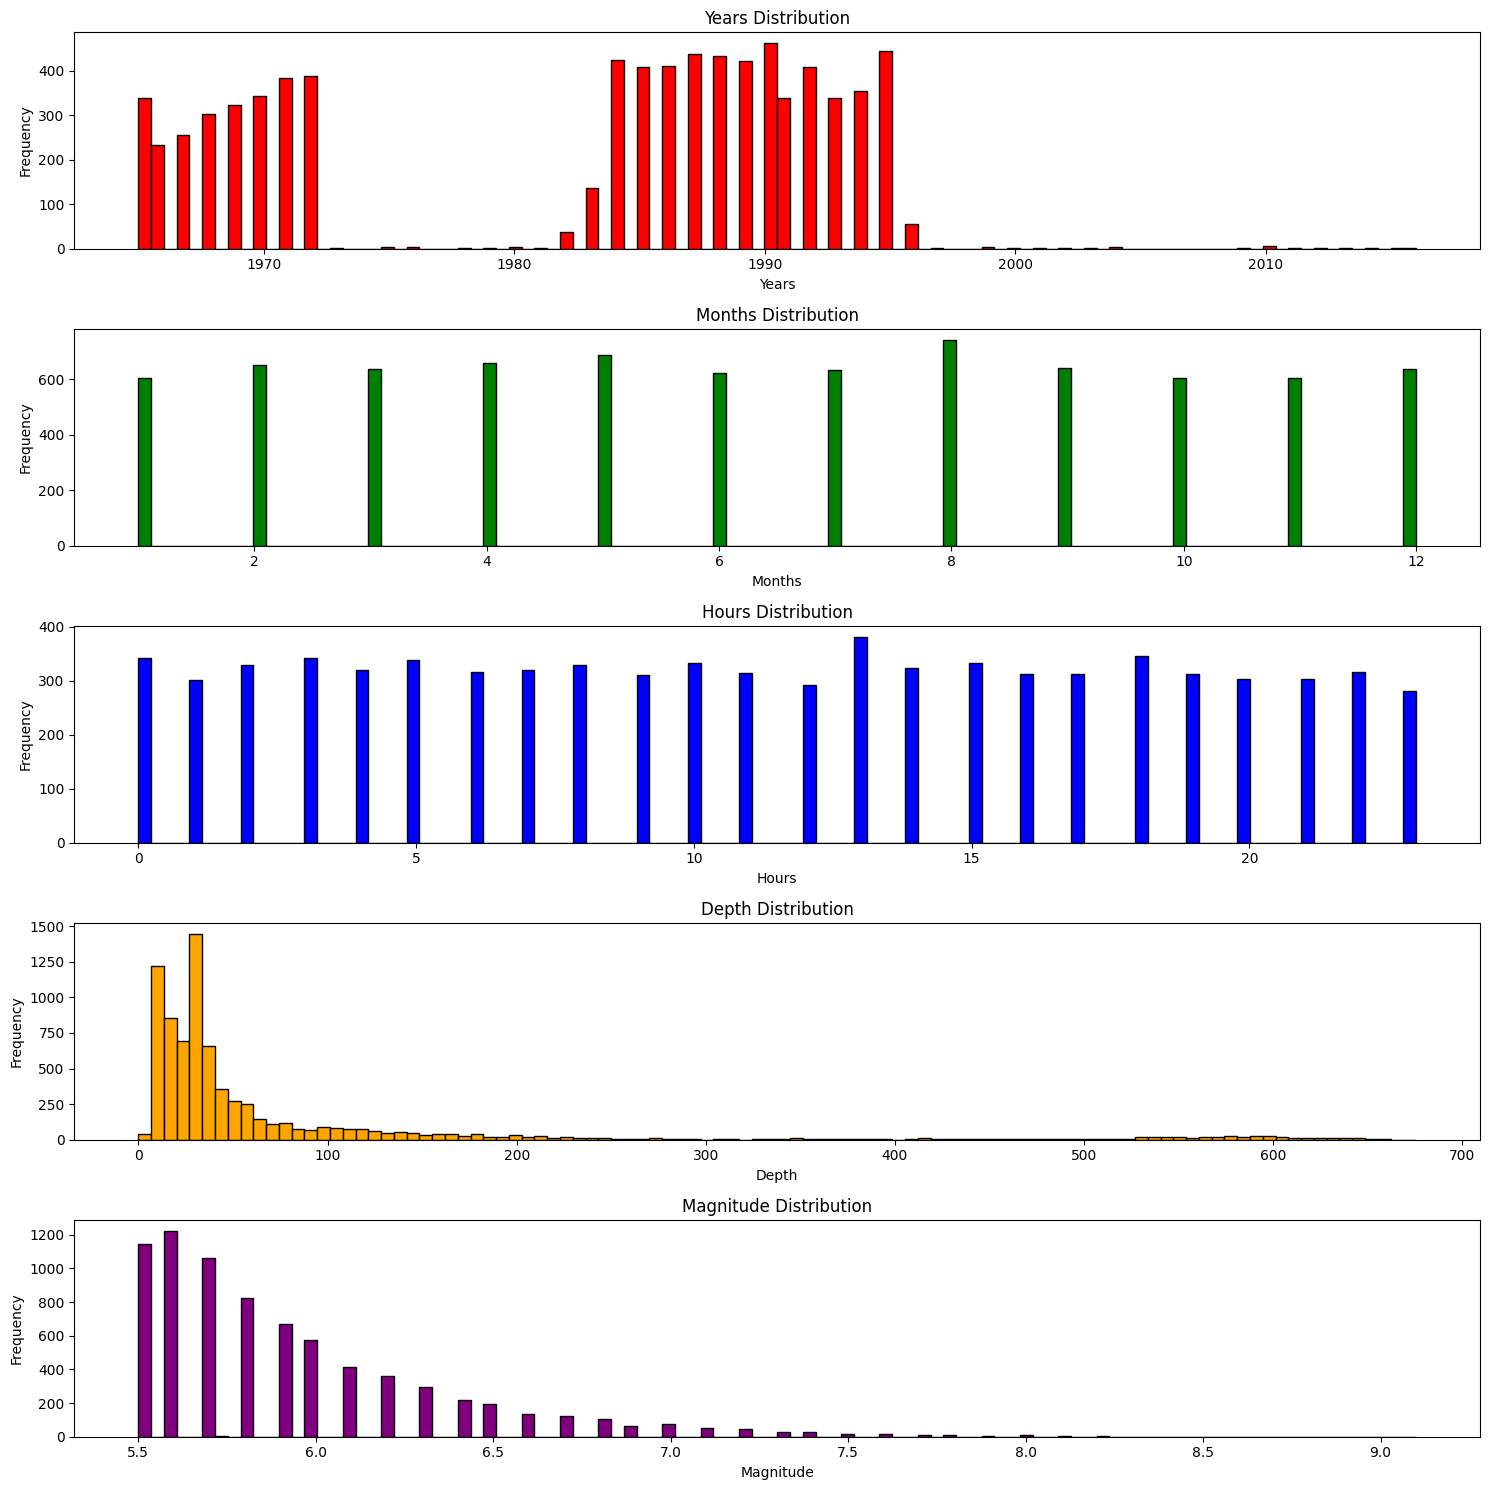

In [175]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue', 'orange', 'purple']

variables = [df['Year'] , df['Month'], df['Hour'], df['Depth'], df['Magnitude']]
labels = ['Years', 'Months', 'Hours', 'Depth', 'Magnitude']

fig, axs = plt.subplots(5, 1, figsize=(15, 15))

for ax, variable, color, label in zip(axs, variables, colors, labels):
    ax.hist(variable, color=color, edgecolor='black', bins=100)
    ax.set_xlabel(label)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{label} Distribution')

plt.tight_layout()
plt.show()

In [178]:
"""
def get_damage_description(magnitude):
    if 5.5 <= magnitude <= 6.0:
        return 'Slight damage to buildings and other structures.'
    elif 6.1 <= magnitude <= 6.9:
        return 'May cause a lot of damage in very populated areas.'
    elif 7.0 <= magnitude <= 7.9:
        return 'Major earthquake. Serious damage.'
    else:
        return 'Great earthquake. Can totally destroy communities near the epicenter.'

df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')

df['damage_description'] = df['Magnitude'].apply(get_damage_description)
"""

"\n# Function to map magnitudes to damage descriptions\ndef get_damage_description(magnitude):\n    if 5.5 <= magnitude <= 6.0:\n        return 'Slight damage to buildings and other structures.'\n    elif 6.1 <= magnitude <= 6.9:\n        return 'May cause a lot of damage in very populated areas.'\n    elif 7.0 <= magnitude <= 7.9:\n        return 'Major earthquake. Serious damage.'\n    else:\n        return 'Great earthquake. Can totally destroy communities near the epicenter.'\n\n# Convert 'mw' to numeric (ensure it's a numeric column)\ndf['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')\n\n# Create a new column 'damage_description' based on earthquake magnitudes\ndf['damage_description'] = df['Magnitude'].apply(get_damage_description)\n"

In [179]:
df.head()

,Latitude,Longitude,Depth,Magnitude,Status,Year,Month,Hour
0,19.246,145.616,131.6,6.0,Automatic,1965,1,13
1,1.863,127.352,80.0,5.8,Automatic,1965,1,11
2,-20.579,-173.972,20.0,6.2,Automatic,1965,1,18
3,-59.076,-23.557,15.0,5.8,Automatic,1965,1,18
4,11.938,126.427,15.0,5.8,Automatic,1965,1,13


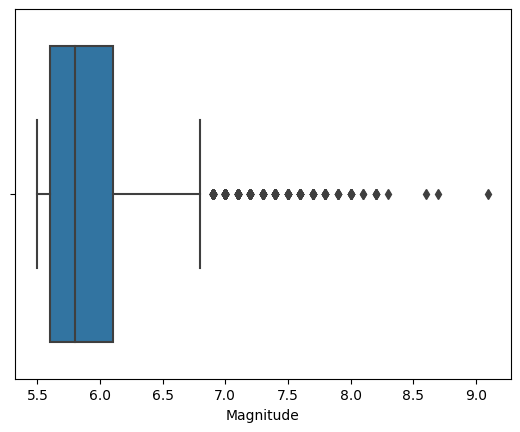

In [180]:
sns.boxplot(x=df['Magnitude'])
plt.show()

In [182]:
import folium
from datetime import datetime
from ipywidgets import interact, IntSlider

def plot_earthquakes(year):
    m = folium.Map(location=[0, 0], zoom_start=2)

    for _, row in df[df['Year'] == year].iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Magnitude'] * 1,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            popup=f"Magnitude: {row['Magnitude']:.2f}, Depth: {row['Depth']:.2f}",
        ).add_to(m)

    print(f"Earthquakes in {year}")

    return m

year_slider = IntSlider(
    value=df['Year'].min(),
    min=df['Year'].min(),
    max=df['Year'].max(),
    step=1,
    description='Year',
)

interact(plot_earthquakes, year=year_slider)

interactive(children=(IntSlider(value=1965, description='Year', max=2016, min=1965), Output()), _dom_classes=(…

<function __main__.plot_earthquakes(year)>

In [185]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Latitude'] = le.fit_transform(df['Latitude'])
df['Longitude'] = le.fit_transform(df['Longitude'])
df['Depth'] = le.fit_transform(df['Depth'])
df['Magnitude'] = le.fit_transform(df['Magnitude'])
df['Year'] = le.fit_transform(df['Year'])
df['Status'] = le.fit_transform(df['Status'])

In [199]:
df['Status'].value_counts()

1    5141
0    2581
Name: Status, dtype: int64

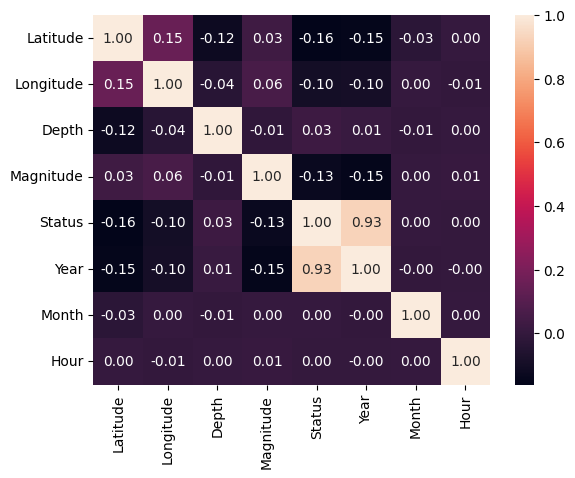

In [187]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [188]:
df.head()

,Latitude,Longitude,Depth,Magnitude,Status,Year,Month,Hour
0,5139,5566,1045,10,0,0,1,13
1,4015,4574,719,6,0,0,1,11
2,1551,764,171,13,0,0,1,18
3,105,2669,118,6,0,0,1,18
4,4651,4400,118,6,0,0,1,13


In [189]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
df.shape

(7722, 8)

In [190]:
X_train.shape

(6177, 7)

In [191]:
X_test.shape

(1545, 7)

In [192]:
y_train.shape

(6177,)

In [193]:
y_test.shape

(1545,)

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       510
           1       1.00      1.00      1.00      1035

    accuracy                           1.00      1545
   macro avg       1.00      1.00      1.00      1545
weighted avg       1.00      1.00      1.00      1545



In [195]:
rf_classifier.feature_importances_

array([0.01756459, 0.01137313, 0.03131882, 0.02465356, 0.90829236,
       0.0035216 , 0.00327595])

In [196]:
df.columns

Index(['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Status', 'Year',
       'Month', 'Hour'],
      dtype='object')